In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Set Up

In [10]:
# LOAD RESULTS
res_p = '/Users/harveyaa/Documents/masters/neuropsych_mtl/ML/benchmark_1/results/'
out_p = '/Users/harveyaa/Documents/masters/neuropsych_mtl/ML/benchmark_1/results/'

strat_p = os.path.join(res_p,'stratify.csv')
res_strat = 100*pd.read_csv(strat_p,index_col=0,header=[0,1])

loo_p = os.path.join(res_p,'LOO.csv')
res_loo = 100*pd.read_csv(loo_p,index_col=0,header=[0,1])

In [11]:
# DEFINTE CLASSIFIERS

clfs = res_strat.index.to_list()

In [12]:
# DEFINE / ORDER / FORMAT LABELS

cases_effect_order = ['BIP',
                    'SZ',
                    'ASD',
                    'ADHD',

                    'DEL22q11_2',
                    'DEL16p11_2',
                    'DUP1q21_1',
                    'DEL1q21_1',
                    'DUP16p11_2',
                    'DUP22q11_2',
                    'DEL15q11_2',
                     
                    'DEL13q12_12',
                    'DUP13q12_12',
                    'TAR_dup',
                    'DUP16p13_11',
                    'DUP2q13',
                    'DUP15q11_2',
                    'DEL2q13',
                    'DUP15q13_3_CHRNA7']
cases_labels =       ['BIP                  n=44',
                    'SZ                   n=283',
                    'ASD                 n=472',
                    'ADHD              n=223',

                    'DEL 22q11.2     n=43',
                    'DEL 16p11.2      n=32',
                    'DUP 1q21.1       n=19',
                    'DEL 1q21.1       n=25',
                    'DUP 16p11.2     n=35',
                    'DUP 22q11.2     n=22',
                    'DEL 15q11.2    n=103',
                     
                    'DEL 13q12.12   n=22',
                    'DUP 13q12.12   n=20',
                    'DUP TAR           n=29',
                    'DUP 16p13.11  n=39',
                    'DUP 2q13         n=88',
                    'DUP 15q11.2   n=136',
                    'DEL 2q13         n=183',
                    'DUP 15q13.3   n=191']
cases_effect_order.reverse()
cases_labels.reverse()

cases_effect_order_loo = ['BIP',
                    'SZ',
                    'ASD',
                    'ADHD',

                    'DEL16p11_2',
                    'DUP1q21_1',
                    'DEL1q21_1',
                    'DUP16p11_2',
                    'DUP22q11_2',
                    'DEL15q11_2',
                     
                    'DEL13q12_12',
                    'DUP13q12_12',
                    'TAR_dup',
                    'DUP16p13_11',
                    'DUP2q13',
                    'DUP15q11_2',
                    'DEL2q13',
                    'DUP15q13_3_CHRNA7']
cases_labels_loo =  ['BIP                  n=44',
                    'SZ                   n=283',
                    'ASD                 n=472',
                    'ADHD              n=223',

                    'DEL 16p11.2      n=32',
                    'DUP 1q21.1       n=19',
                    'DEL 1q21.1       n=25',
                    'DUP 16p11.2     n=35',
                    'DUP 22q11.2     n=22',
                    'DEL 15q11.2    n=103',
                     
                    'DEL 13q12.12   n=22',
                    'DUP 13q12.12   n=20',
                    'DUP TAR           n=29',
                    'DUP 16p13.11  n=39',
                    'DUP 2q13         n=88',
                    'DUP 15q11.2   n=136',
                    'DEL 2q13         n=183',
                    'DUP 15q13.3   n=191']

cases_effect_order_loo.reverse()
cases_labels_loo.reverse()

# Stratified

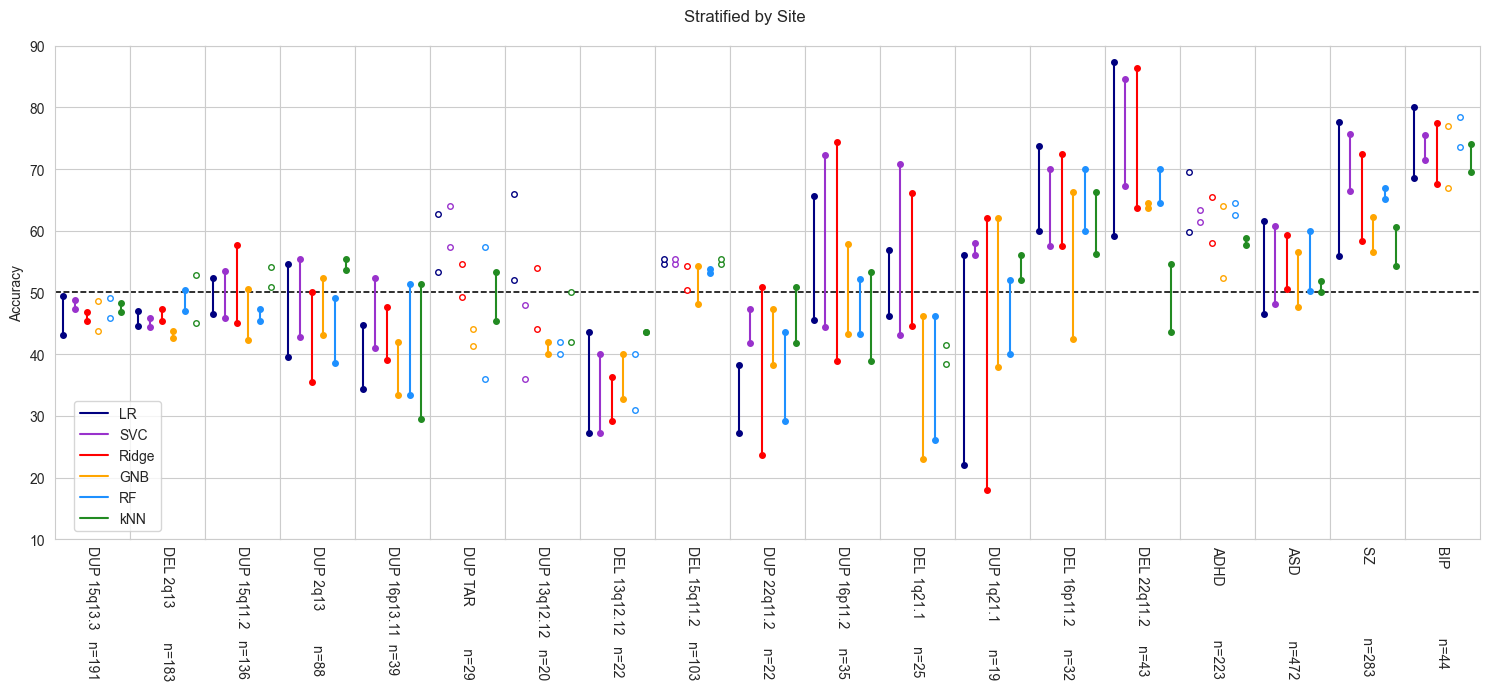

In [13]:
#################
# STRAT BY SITE #
#################
title = 'Stratified by Site'
fig,ax = plt.subplots(1,len(cases_effect_order),figsize=(15,7),sharey=True,sharex=True)
plt.yticks([0,10,20,30,40,50,60,70,80,90,100])
sns.set_style('whitegrid')
colors = ['navy','darkorchid','red','orange','dodgerblue','forestgreen']

for j,case in enumerate(cases_effect_order):
    for i,clf in enumerate(clfs):
        conf_acc = res_strat.loc[clf][case].loc['conf']
        conn_acc = res_strat.loc[clf][case].loc['conf_conn']
        if conf_acc > conn_acc:
            mfc = 'white'
            ls =''
        else:
            mfc = colors[i]
            ls = '-'

        ax[j].plot(i,conn_acc,marker='o',color=colors[i],ms=4,markerfacecolor=mfc)
        ax[j].plot(i,conf_acc,marker='o',color=colors[i],ms=4,markerfacecolor=mfc)
        ax[j].plot((i,i),(conf_acc,conn_acc),color=colors[i],ls=ls,label=clf)
        ax[j].set_xticklabels([])
        ax[j].set_xticks([])
        ax[j].set_xlim(-0.75,5.75)
        ax[j].set_xlabel(cases_labels[j],rotation=270)

        lines = ax[j].get_ygridlines()
        b = lines[5]
        b.set_color('black')
        b.set_linewidth(1.15)
        b.set_linestyle('--')

handles, _ = ax[-2].get_legend_handles_labels()
labels = clfs
ax[0].set_ylabel('Accuracy')
fig.legend(handles, labels, loc=(0.05,0.23))
plt.suptitle(title)
plt.ylim(10,90)
plt.tight_layout()
plt.subplots_adjust(wspace=0)
plt.savefig(os.path.join(out_p,'stratify.png'),dpi=300)

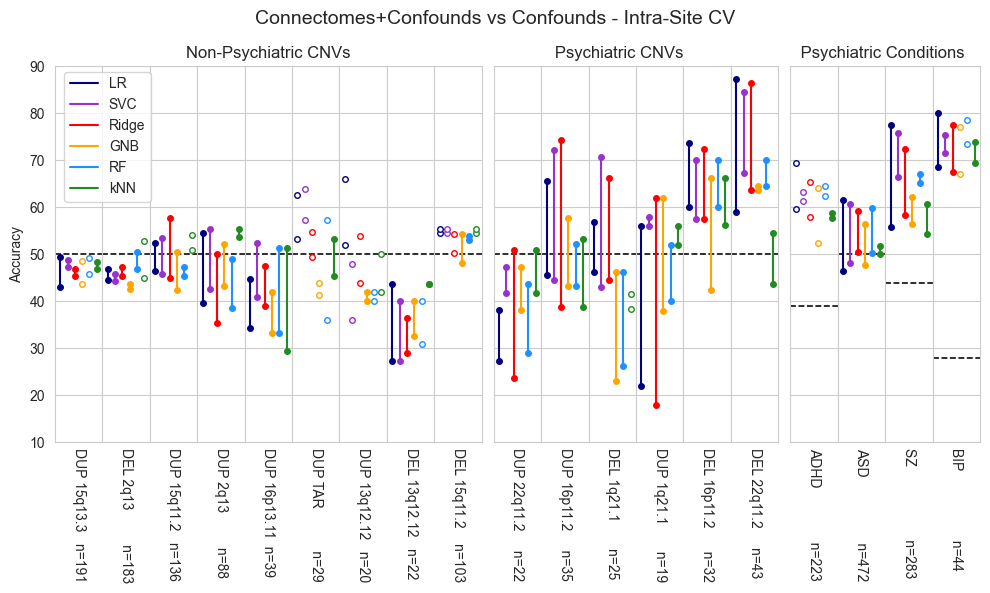

In [85]:
#################
# STRAT BY SITE # V2
#################
title = 'Connectomes+Confounds vs Confounds - Intra-Site CV'
fig,ax = plt.subplots(1,len(cases_effect_order)+2,figsize=(10,6),sharey=True,sharex=True,
            gridspec_kw={'width_ratios':[1,1,1,1,1,1,1,1,1,0.25,1,1,1,1,1,1,0.25,1,1,1,1]})
plt.yticks([0,10,20,28,30,39,40,44,50,60,70,80,90,100])
sns.set_style('whitegrid')
colors = ['navy','darkorchid','red','orange','dodgerblue','forestgreen']

dummies = []
dummies_labels = []
for i in range(len(cases_effect_order)):
    dummies.append(cases_effect_order[i])
    dummies_labels.append(cases_labels[i])
    if (i == 8) | (i==14):
        dummies.append(None)
        dummies_labels.append(None)

for j in range(len(cases_effect_order)+2):
    case = dummies[j]
    if case is not None:
        for i,clf in enumerate(clfs):
            conf_acc = res_strat.loc[clf][case].loc['conf']
            conn_acc = res_strat.loc[clf][case].loc['conf_conn']
            if conf_acc > conn_acc:
                mfc = 'white'
                ls =''
            else:
                mfc = colors[i]
                ls = '-'

            ax[j].plot(i,conn_acc,marker='o',color=colors[i],ms=4,markerfacecolor=mfc)
            ax[j].plot(i,conf_acc,marker='o',color=colors[i],ms=4,markerfacecolor=mfc)
            ax[j].plot((i,i),(conf_acc,conn_acc),color=colors[i],ls=ls,label=clf)
            ax[j].set_xticklabels([])
            ax[j].set_xticks([])
            ax[j].set_xlim(-0.75,5.75)
            ax[j].set_xlabel(dummies_labels[j],rotation=270)

            lines = ax[j].get_ygridlines()
            b = lines[5]
            b.set_color('black')
            b.set_linewidth(1.15)
            b.set_linestyle('--')
            lines = ax[j].get_ygridlines()
        if case not in ['ADHD','BIP','SZ']:
            b = lines[8]
            b.set_color('black')
            b.set_linewidth(1.15)
            b.set_linestyle('--')

            w1 = lines[3] # BIP
            w1.set_color('white')
            w1.set_linewidth(1.15)
            w1.set_linestyle('-')

            w2 = lines[5] # ADHD
            w2.set_color('white')
            w2.set_linewidth(1.15)
            w2.set_linestyle('-')

            w2 = lines[7] # SZ
            w2.set_color('white')
            w2.set_linewidth(1.15)
            w2.set_linestyle('-')
        if case == 'ADHD':
            w1 = lines[3] # BIP
            w1.set_color('white')
            w1.set_linewidth(1.15)
            w1.set_linestyle('-')

            w2 = lines[5] # ADHD
            w2.set_color('black')
            w2.set_linewidth(1.15)
            w2.set_linestyle('--')

            w2 = lines[7] # SZ
            w2.set_color('white')
            w2.set_linewidth(1.15)
            w2.set_linestyle('-')
        if case == 'SZ':
            w1 = lines[3] # BIP
            w1.set_color('white')
            w1.set_linewidth(1.15)
            w1.set_linestyle('-')

            w2 = lines[5] # ADHD
            w2.set_color('white')
            w2.set_linewidth(1.15)
            w2.set_linestyle('-')

            w2 = lines[7] # SZ
            w2.set_color('black')
            w2.set_linewidth(1.15)
            w2.set_linestyle('--')
        if case == 'BIP':
            w1 = lines[3] # BIP
            w1.set_color('black')
            w1.set_linewidth(1.15)
            w1.set_linestyle('--')

            w2 = lines[5] # ADHD
            w2.set_color('white')
            w2.set_linewidth(1.15)
            w2.set_linestyle('-')

            w2 = lines[7] # SZ
            w2.set_color('white')
            w2.set_linewidth(1.15)
            w2.set_linestyle('-')
            
    if (j == 8)|(j==15):
        j = j+1
        ax[j].axes.set_axis_off()

handles, _ = ax[-2].get_legend_handles_labels()
labels = clfs
ax[0].set_ylabel('Accuracy')
ax[0].set_yticklabels([0,10,20,None,30,None,40,None,50,60,70,80,90,100])

ax[4].set_title('Non-Psychiatric CNVs')
ax[12].set_title('   Psychiatric CNVs')
ax[18].set_title('         Psychiatric Conditions')

fig.legend(handles, labels, loc=(0.065,0.66))
plt.suptitle(title,fontsize=14)
plt.ylim(10,90)
plt.tight_layout()
plt.subplots_adjust(wspace=0)
plt.savefig(os.path.join(out_p,'stratify.png'),dpi=300)

# LOO

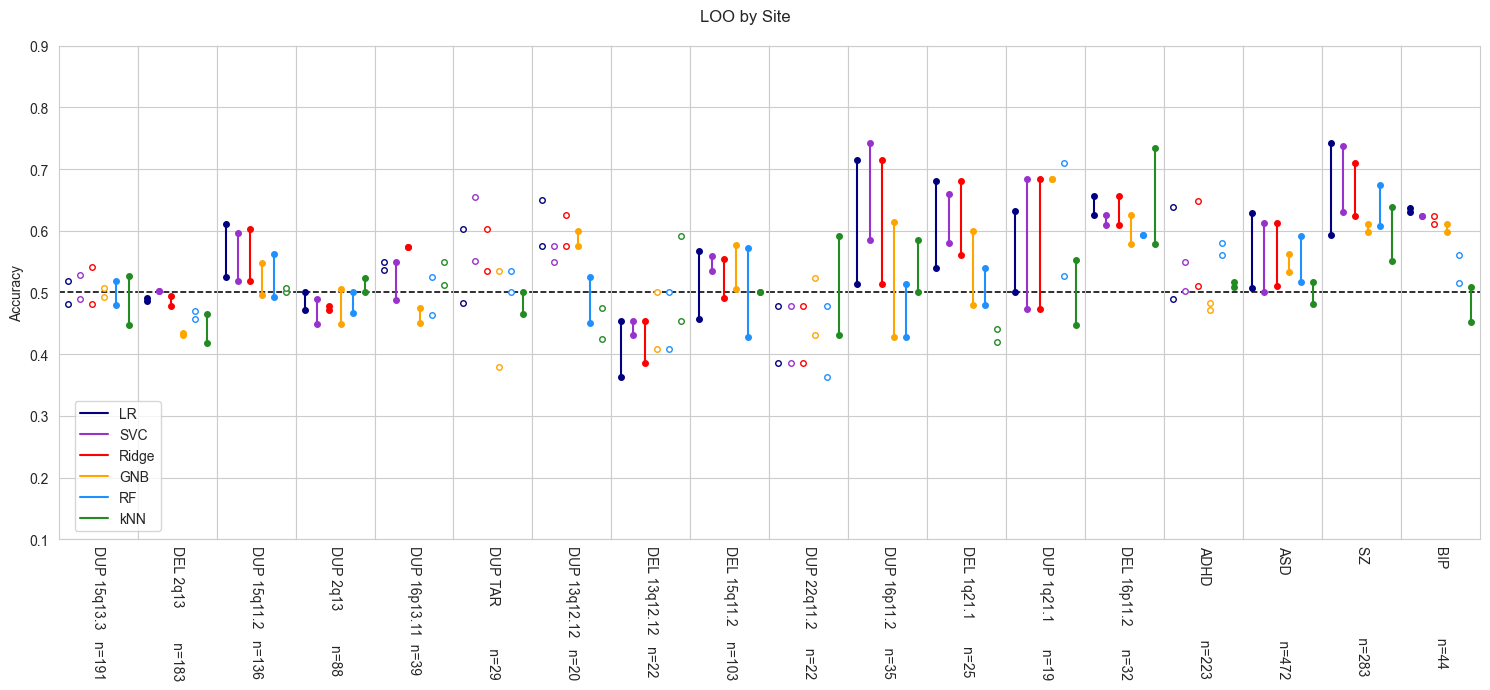

In [6]:
###############
# LOO by Site #
###############
title = 'LOO by Site'
fig,ax = plt.subplots(1,len(cases_effect_order_loo),figsize=(15,7),sharey=True,sharex=True)
plt.yticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
sns.set_style('whitegrid')
colors = ['navy','darkorchid','red','orange','dodgerblue','forestgreen']

dummies = []
dummies_labels = []
for i in range(len(cases_effect_order)):
    dummies.append(cases_effect_order[i])
    dummies_labels.append(cases_labels[i])
    if (i == 8) | (i==14):
        dummies.append(None)
        dummies_labels.append(None)

for j,case in enumerate(cases_effect_order_loo):
    for i,clf in enumerate(clfs):
        conf_acc = res_loo.loc[clf][case].loc['conf']
        conn_acc = res_loo.loc[clf][case].loc['conf_conn']
        if conf_acc > conn_acc:
            mfc = 'white'
            ls =''
        else:
            mfc = colors[i]
            ls = '-'

        ax[j].plot(i,conn_acc,marker='o',color=colors[i],ms=4,markerfacecolor=mfc)
        ax[j].plot(i,conf_acc,marker='o',color=colors[i],ms=4,markerfacecolor=mfc)
        ax[j].plot((i,i),(conf_acc,conn_acc),color=colors[i],ls=ls,label=clf)
        ax[j].set_xticklabels([])
        ax[j].set_xticks([])
        ax[j].set_xlim(-0.75,5.75)
        ax[j].set_xlabel(cases_labels_loo[j],rotation=270)

        lines = ax[j].get_ygridlines()
        b = lines[5]
        b.set_color('black')
        b.set_linewidth(1.15)
        b.set_linestyle('--')

handles, _ = ax[-3].get_legend_handles_labels()
labels = clfs
ax[0].set_ylabel('Accuracy')
fig.legend(handles, labels, loc=(0.05,0.23))
plt.suptitle(title)
plt.ylim(0.1,0.9)
plt.tight_layout()
plt.subplots_adjust(wspace=0)
plt.savefig(os.path.join(out_p,'LOO.png'),dpi=300)

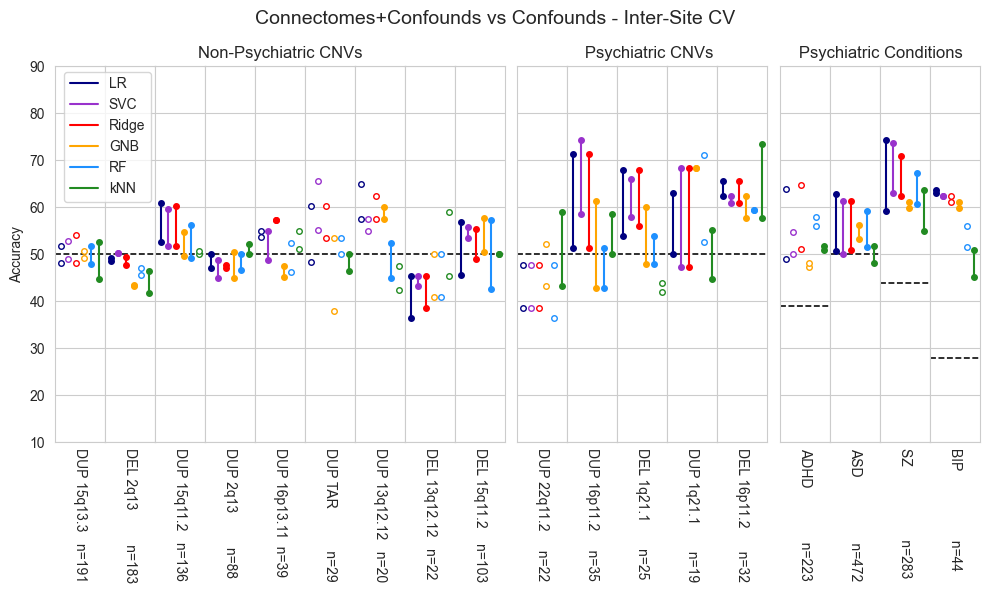

In [81]:
###############
# LOO by Site # V2
###############
title = 'Connectomes+Confounds vs Confounds - Inter-Site CV'
fig,ax = plt.subplots(1,len(cases_effect_order_loo)+2,figsize=(10,6),sharey=True,sharex=True,
            gridspec_kw={'width_ratios':[1,1,1,1,1,1,1,1,1,0.25,1,1,1,1,1,0.25,1,1,1,1]})
plt.yticks([0,10,20,28,30,39,40,44,50,60,70,80,90,100])
sns.set_style('whitegrid')
colors = ['navy','darkorchid','red','orange','dodgerblue','forestgreen']

dummies_loo = []
dummies_labels_loo = []
for i in range(len(cases_effect_order_loo)):
    dummies_loo.append(cases_effect_order_loo[i])
    dummies_labels_loo.append(cases_labels_loo[i])
    if (i == 8) | (i==13):
        dummies_loo.append(None)
        dummies_labels_loo.append(None)

for j in range(len(cases_effect_order_loo)+2):
    case = dummies_loo[j]
    if case is not None:
        for i,clf in enumerate(clfs):
            conf_acc = res_loo.loc[clf][case].loc['conf']
            conn_acc = res_loo.loc[clf][case].loc['conf_conn']
            if conf_acc > conn_acc:
                mfc = 'white'
                ls =''
            else:
                mfc = colors[i]
                ls = '-'

            ax[j].plot(i,conn_acc,marker='o',color=colors[i],ms=4,markerfacecolor=mfc)
            ax[j].plot(i,conf_acc,marker='o',color=colors[i],ms=4,markerfacecolor=mfc)
            ax[j].plot((i,i),(conf_acc,conn_acc),color=colors[i],ls=ls,label=clf)
            ax[j].set_xticklabels([])
            ax[j].set_xticks([])
            ax[j].set_xlim(-0.75,5.75)
            ax[j].set_xlabel(dummies_labels_loo[j],rotation=270)

        lines = ax[j].get_ygridlines()
        if case not in ['ADHD','BIP','SZ']:
            b = lines[8]
            b.set_color('black')
            b.set_linewidth(1.15)
            b.set_linestyle('--')

            w1 = lines[3] # BIP
            w1.set_color('white')
            w1.set_linewidth(1.15)
            w1.set_linestyle('-')

            w2 = lines[5] # ADHD
            w2.set_color('white')
            w2.set_linewidth(1.15)
            w2.set_linestyle('-')

            w2 = lines[7] # SZ
            w2.set_color('white')
            w2.set_linewidth(1.15)
            w2.set_linestyle('-')
        if case == 'ADHD':
            w1 = lines[3] # BIP
            w1.set_color('white')
            w1.set_linewidth(1.15)
            w1.set_linestyle('-')

            w2 = lines[5] # ADHD
            w2.set_color('black')
            w2.set_linewidth(1.15)
            w2.set_linestyle('--')

            w2 = lines[7] # SZ
            w2.set_color('white')
            w2.set_linewidth(1.15)
            w2.set_linestyle('-')
        if case == 'SZ':
            w1 = lines[3] # BIP
            w1.set_color('white')
            w1.set_linewidth(1.15)
            w1.set_linestyle('-')

            w2 = lines[5] # ADHD
            w2.set_color('white')
            w2.set_linewidth(1.15)
            w2.set_linestyle('-')

            w2 = lines[7] # SZ
            w2.set_color('black')
            w2.set_linewidth(1.15)
            w2.set_linestyle('--')
        if case == 'BIP':
            w1 = lines[3] # BIP
            w1.set_color('black')
            w1.set_linewidth(1.15)
            w1.set_linestyle('--')

            w2 = lines[5] # ADHD
            w2.set_color('white')
            w2.set_linewidth(1.15)
            w2.set_linestyle('-')

            w2 = lines[7] # SZ
            w2.set_color('white')
            w2.set_linewidth(1.15)
            w2.set_linestyle('-')

    if (j == 8)|(j==14):
        j = j+1
        ax[j].axes.set_axis_off()

handles, _ = ax[-3].get_legend_handles_labels()
labels = clfs
ax[0].set_ylabel('Accuracy')
ax[0].set_yticklabels([0,10,20,None,30,None,40,None,50,60,70,80,90,100])

ax[4].set_title('Non-Psychiatric CNVs')
ax[12].set_title('   Psychiatric CNVs')
ax[17].set_title('           Psychiatric Conditions')

fig.legend(handles, labels, loc=(0.065,0.66))
plt.suptitle(title,fontsize=14)
plt.ylim(10,90)
plt.tight_layout()
plt.subplots_adjust(wspace=0)
plt.savefig(os.path.join(out_p,'LOO.png'),dpi=300)